<h1> LOGISTIC REGRESSION IN TITANIC DATA SET

In [1]:
df=read.csv("C:\\Users\\LENOVO\\Desktop\\sem II\\R\\ds\\train.csv")

In [2]:
head(df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [3]:
install.packages('Amelia')

Installing package into 'C:/Users/LENOVO/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'Amelia' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\LENOVO\AppData\Local\Temp\Rtmp8yzn8y\downloaded_packages


<h2> EXPLORATORY DATA ANALYSIS

<h1> Here we are going to check how many missing values we have in our data set

Warning message:
"package 'Amelia' was built under R version 3.6.2"Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2020 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


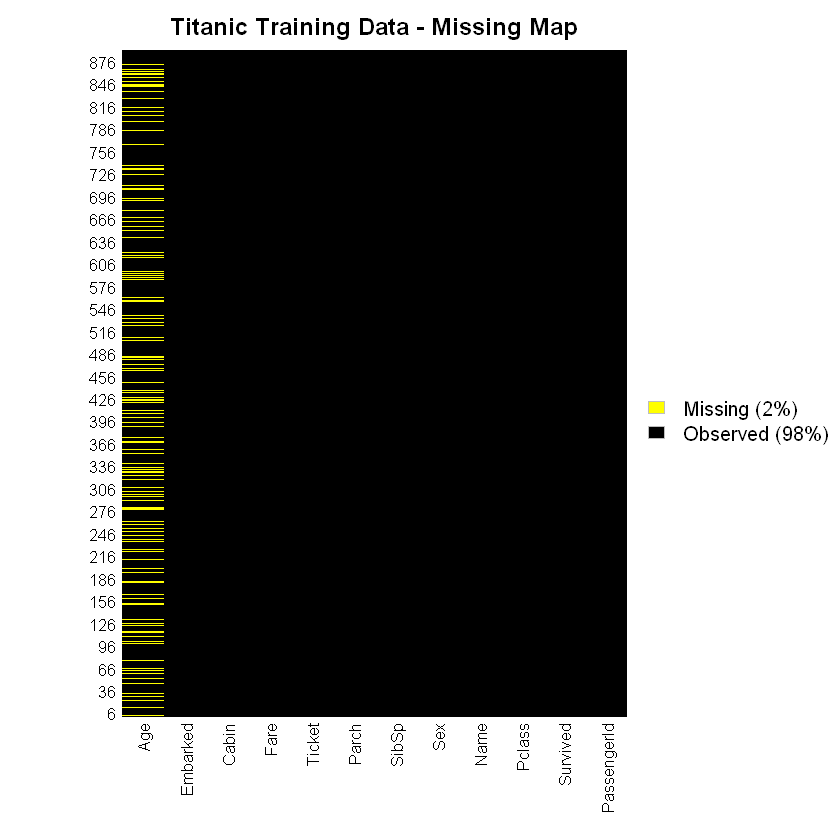

In [4]:
library(Amelia)
missmap(df,main="Titanic Training Data - Missing Map",
       col=c("yellow","black"), legend=TRUE)

<h3> In the above visualization we found out that there are some missing values in age category. we will work on to replace those missing values

<H2> DATA VISUALIZATION GGPLOT2

In [5]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.2"

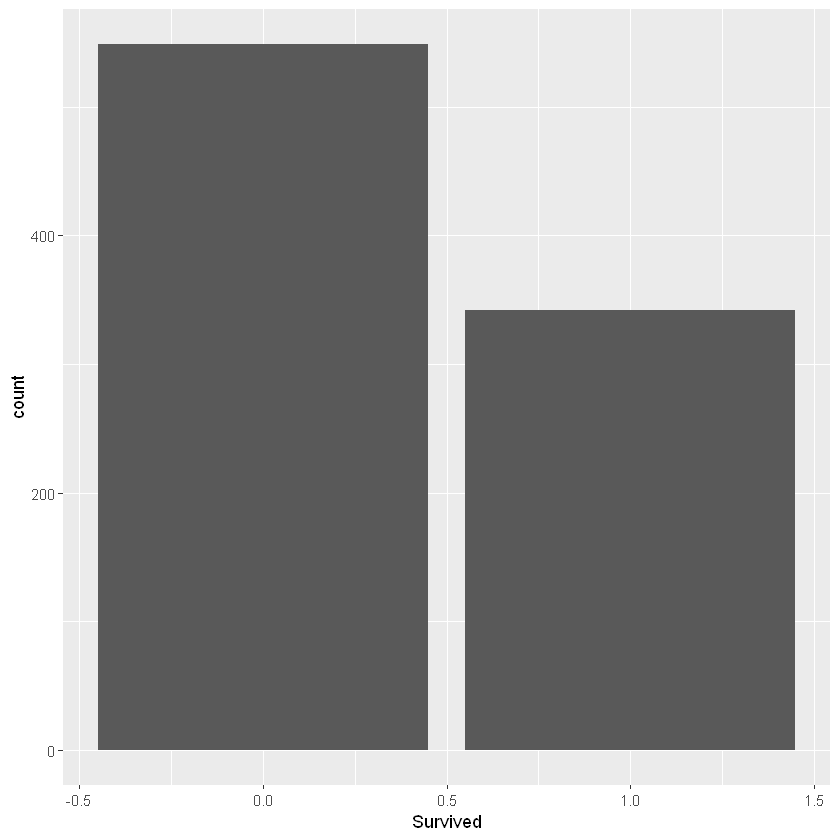

In [6]:
ggplot(df,aes(Survived)) + geom_bar()

<h3> Here we used bar chart to show how many people have survive and not survived

<h2>The below bar chart describes count of passengers belnging to which class

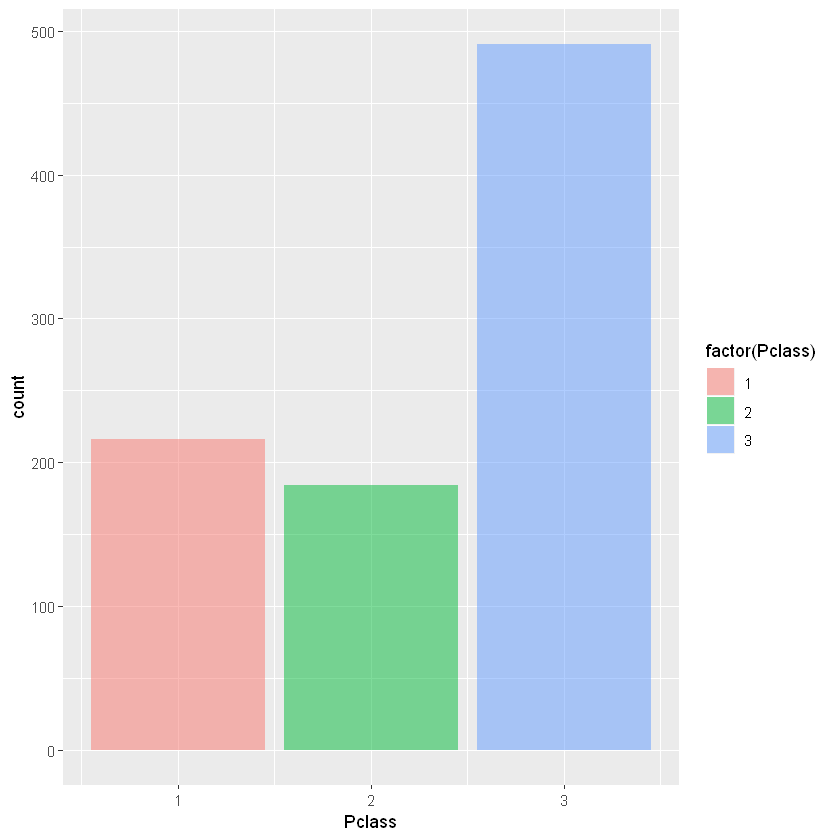

In [7]:
ggplot(df,aes(Pclass)) + geom_bar(aes(fill=factor(Pclass)),alpha=0.5)

<h2> The bar chart showing the number of male and female passsengers

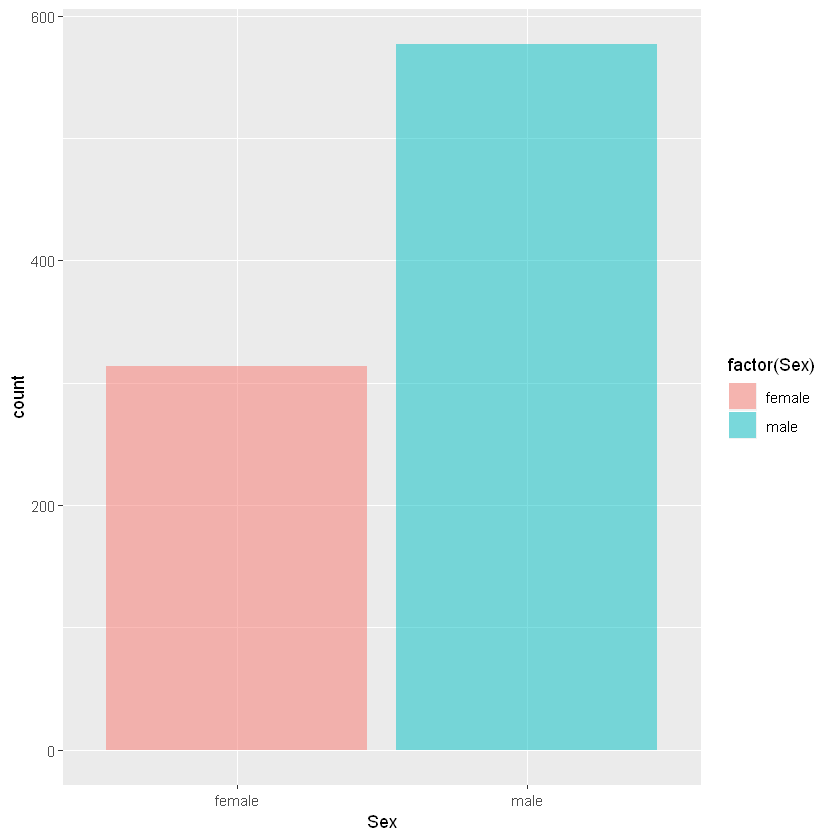

In [8]:
ggplot(df,aes(Sex)) + geom_bar(aes(fill=factor(Sex)),alpha=0.5)

Warning message:
"Removed 177 rows containing non-finite values (stat_bin)."

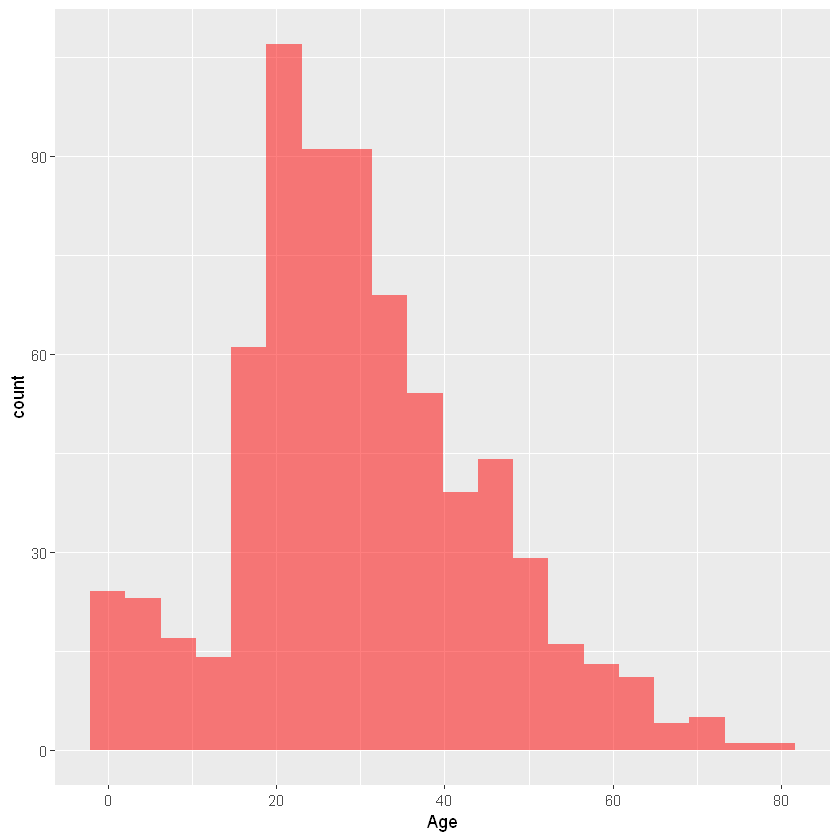

In [9]:
ggplot(df,aes(Age)) + geom_histogram(fill='red',bins=20,alpha=0.5)

<h3> From this histogram we can understand that most of the passengers belong to middle age category

<h1> Data cleaning

<h3> So there are some missing values in age category so we are taking the mean age of passengers belonging to particular passenger class and replacing the missing values with mean age beloning to passenger class

Warning message:
"Removed 177 rows containing non-finite values (stat_boxplot)."

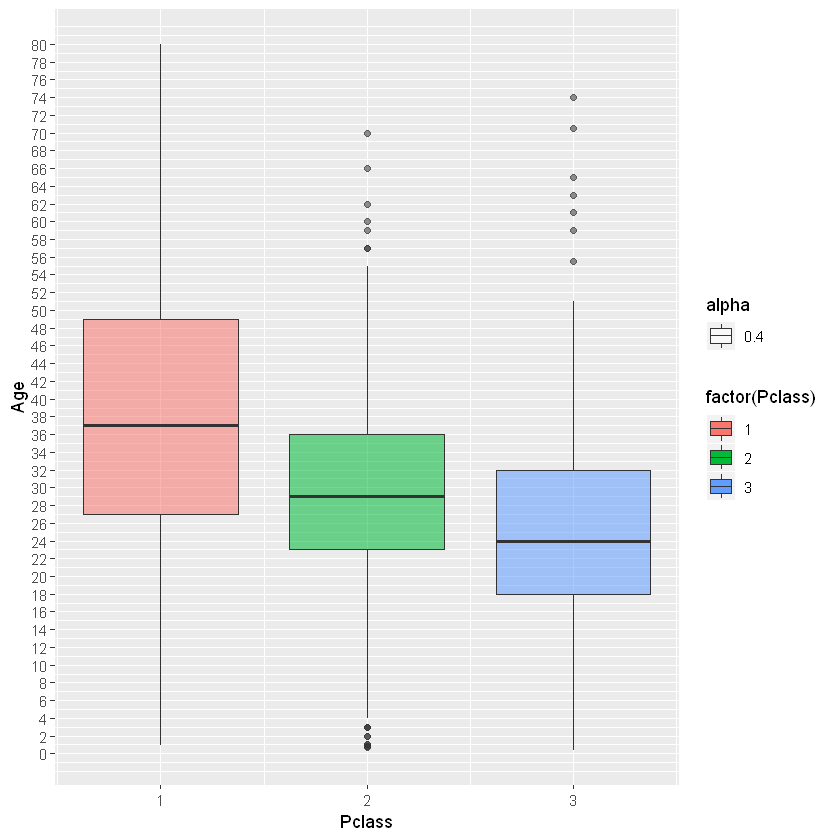

In [10]:
pl=ggplot(df,aes(Pclass,Age)) + geom_boxplot (aes(group=Pclass,fill=factor(Pclass),alpha=0.4))
pl + scale_y_continuous(breaks = seq(min(0), max(80), by = 2))

In [11]:
input_age = function(age,class){
    out=age
    for (i in 1:length(age)){
        
        if (is.na(age[i])){
            
            if (class[i] == 1){
                out[i] = 37
            }else if (class[i] == 2){
                out[i] = 29
            }else{
                out[i] = 24
            }
        }else{
            out[i]=age[i]
        }
    }
    return(out)
}    

In [12]:
fixed.ages=input_age(df$Age,df$Pclass)

In [13]:
df$Age=fixed.ages

<h3> Here we replaced the missing values and found none of the missing values in our age category

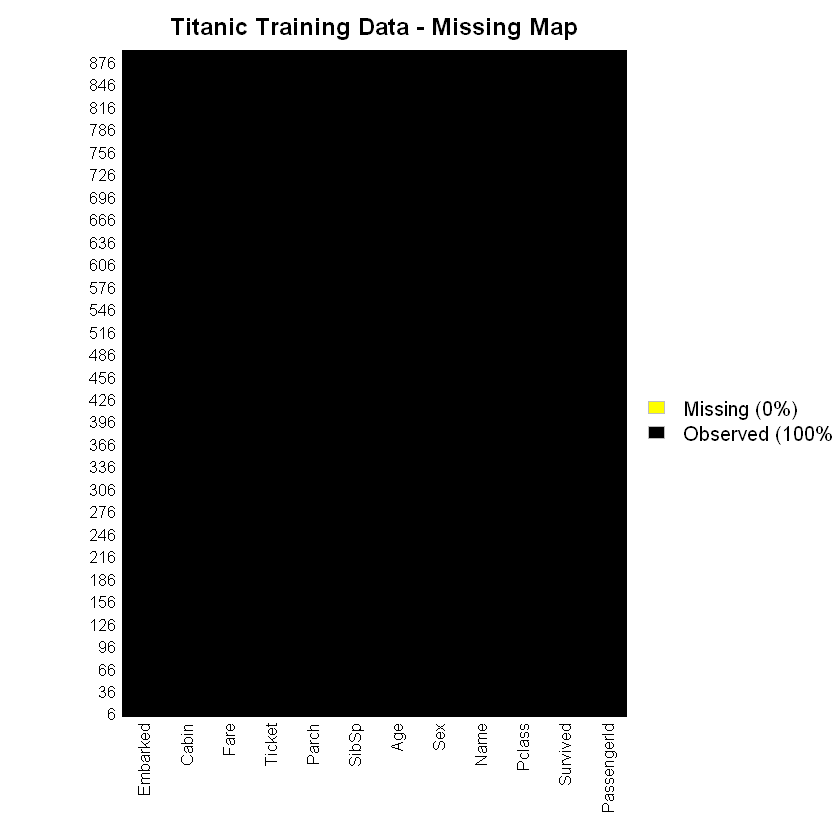

In [14]:
missmap(df,main="Titanic Training Data - Missing Map",
       col=c("yellow","black"), legend=TRUE)


<h3> BUILDING A LOGISTIC REGRESSION MODEL

<h3> We want to build our model. so, we want the right parameters and we are eliminating the parameters which are not contributing for prediction

In [15]:
str(df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 24 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [16]:
head(df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,24,0,0,330877,8.4583,,Q


In [17]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [18]:
df=select(df,-PassengerId,-Name,-Ticket,-Cabin)#we can also give index to remove

In [19]:
head(df,3)

Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22,1,0,7.2500,S
1,1,female,38,1,0,71.2833,C
1,3,female,26,0,0,7.9250,S


<h3> Here we are converting some parameters into factors for better understanding of the data 

In [20]:
#converting into factor for better data
df$Survived=factor(df$Survived)
df$Pclass=factor(df$Pclass)
df$Parch=factor(df$Parch)
df$SibSp=factor(df$SibSp)

In [21]:
str(df)

'data.frame':	891 obs. of  8 variables:
 $ Survived: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 24 54 2 27 14 ...
 $ SibSp   : Factor w/ 7 levels "0","1","2","3",..: 2 2 1 2 1 1 1 4 1 2 ...
 $ Parch   : Factor w/ 7 levels "0","1","2","3",..: 1 1 1 1 1 1 1 2 3 1 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [22]:
library(caTools)
set.seed(101)

Warning message:
"package 'caTools' was built under R version 3.6.2"

<h3> Here we are making a sample of training and testing data separately

In [23]:
split=sample.split(df$Survived,SplitRatio=0.70)
final.train=subset(df,split==TRUE)
final.test=subset(df,split==FALSE)

<h3> So the training set is decided. now we are going to run the model to get the results

In [24]:
#now rerun our model
final.log.model=glm(formula=Survived ~ . , family=binomial(link='logit'),data=final.train)


In [25]:
summary(final.log.model)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = final.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8288  -0.5607  -0.4096   0.6174   2.4898  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.777e+01  2.400e+03   0.007 0.994091    
Pclass2     -1.230e+00  3.814e-01  -3.225 0.001261 ** 
Pclass3     -2.160e+00  3.841e-01  -5.624 1.87e-08 ***
Sexmale     -2.660e+00  2.467e-01 -10.782  < 2e-16 ***
Age         -3.831e-02  1.034e-02  -3.705 0.000212 ***
SibSp1      -2.114e-02  2.755e-01  -0.077 0.938836    
SibSp2      -4.000e-01  6.463e-01  -0.619 0.536028    
SibSp3      -2.324e+00  8.994e-01  -2.584 0.009765 ** 
SibSp4      -1.196e+00  8.302e-01  -1.440 0.149839    
SibSp5      -1.603e+01  9.592e+02  -0.017 0.986666    
SibSp8      -1.633e+01  1.004e+03  -0.016 0.987019    
Parch1       7.290e-01  3.545e-01   2.056 0.039771 *  
Parch2       1.406e-01  4.504e-01   0.312 0.754892    
Parch3

<h2> prediction accuracy

In [26]:
fitted.probabilities=predict(final.log.model,newdata=final.test,type='response')

<h2> lets calculated from predicted values

In [27]:
fitted.results=ifelse(fitted.probabilities>0.5,1,0)

In [28]:
misClasificError=mean(fitted.results != final.test$Survived)
print(paste('Accuracy',1-misClasificError))

[1] "Accuracy 0.798507462686567"


<h3> Our Mdel is able to achieve nearly 80% accuracy

In [29]:
#confusion Matrix
table(final.test$Survived, fitted.probabilities>0.5)

   
    FALSE TRUE
  0   140   25
  1    29   74

<h3> our model has correctly predicted that 74 passengers have survived which is actually 103